In [1]:
import numpy as np
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.random import randn

## Linear Regression in closed-form

In [3]:
X = genfromtxt('stock_prediction_data_scaled.csv', delimiter = ',')
y = genfromtxt('stock_price.csv', delimiter = ',')

print(len(X))
print(X[:10])
print(y[:10])

300
[[ 0.039 -1.214 -0.715 -1.09   1.495 -0.694  0.988  0.953 -1.22  -1.263]
 [ 0.281 -1.47   0.499  0.399 -1.641 -0.094 -1.763 -0.344 -0.809 -0.841]
 [ 1.346 -0.352  0.968 -1.241  1.552  1.027 -1.094  0.612 -0.559  0.454]
 [ 0.988  1.224 -0.388  0.216  0.781 -0.047  1.255 -0.306  1.258  0.879]
 [-0.892  0.828  1.319  0.519  1.095  0.302  1.22  -0.913  0.56  -1.028]
 [-1.585 -1.269  0.057  0.23   0.778 -0.142 -0.872  1.345  0.403 -0.095]
 [-0.629 -0.442 -1.344 -0.229  0.437  0.925 -0.424 -0.385  1.358 -1.166]
 [-0.555 -0.048  0.982 -0.694  1.181 -1.249 -1.78  -0.927  1.625 -0.855]
 [-1.033  0.024 -0.659  1.514 -1.014 -1.141  0.45  -0.722 -0.689  0.251]
 [-0.903 -0.511 -1.114  0.247  0.714 -0.321  0.287  1.638 -0.443 -0.689]]
[ -0.31 -16.86   1.36  12.75   7.91  -2.75  -0.54 -11.51  -4.01   3.08]


In [4]:
ones = np.ones((300, 1))
phi = np.hstack((X, ones))
w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print(w[:10])

[-0.0065  4.0018  0.0098 -0.0076  0.9923  2.9941  3.9916  2.9808  0.9833  1.0097]


In [5]:
reg = LinearRegression().fit(X, y)
w = reg.coef_
print(w[:10])

[-0.0065  4.0018  0.0098 -0.0076  0.9923  2.9941  3.9916  2.9808  0.9833  1.0097]


In [6]:
pred_y = reg.predict((X))
print(pred_y[:10])
print(y[:10])

[ -0.2761 -16.6337   1.4488  12.6085   7.846   -3.0275  -0.3889 -11.0088  -4.2517   3.4583]
[ -0.31 -16.86   1.36  12.75   7.91  -2.75  -0.54 -11.51  -4.01   3.08]


In [7]:
differences = y - pred_y

print("Final MSE:", np.mean(differences))
print(differences[:50])

Final MSE: -2.6645352591003756e-17
[-0.0339 -0.2263 -0.0888  0.1415  0.064   0.2775 -0.1511 -0.5012  0.2417 -0.3783 -0.0991 -0.1592  0.4018  0.1436 -0.1739  0.1826 -0.0245  0.1711  0.0971 -0.1195 -0.0687  0.3125  0.0632 -0.0292  0.2684 -0.0727 -0.0571 -0.2373  0.1397 -0.3875  0.0524 -0.0982 -0.1643  0.4867 -0.0015  0.2113  0.0128
  0.2709  0.2981 -0.1441 -0.0345 -0.471  -0.1597  0.2201  0.06   -0.1962  0.3683  0.2376 -0.0368 -0.0132]


## Polynomial Regression in closed-form

In [8]:
poly = PolynomialFeatures(2)
newX = poly.fit_transform(X)

In [9]:
reg2 = LinearRegression().fit(newX, y)
pred_y2 = reg2.predict((newX))
print(pred_y[:10])
print(y[:10])

[ -0.2761 -16.6337   1.4488  12.6085   7.846   -3.0275  -0.3889 -11.0088  -4.2517   3.4583]
[ -0.31 -16.86   1.36  12.75   7.91  -2.75  -0.54 -11.51  -4.01   3.08]


In [10]:
differences = y - pred_y2

print("final MSE:", np.mean(differences))
print(differences[:50])

final MSE: -5.299464570877414e-16
[ 0.0745 -0.0929 -0.2354  0.1374  0.1865  0.3491 -0.1646 -0.3639  0.124  -0.3186 -0.0994 -0.2791  0.3752  0.1843 -0.1774  0.1655 -0.0475  0.1888  0.0804 -0.0702 -0.0988  0.2868 -0.0687 -0.064   0.2702 -0.0969 -0.0751 -0.3088  0.1555 -0.2525 -0.0389  0.0373 -0.15    0.4709 -0.0141  0.2419  0.0603
  0.222   0.1075 -0.0802 -0.0743 -0.294  -0.1975  0.287   0.0225 -0.1627  0.2873  0.243  -0.0171 -0.1056]


## Linear Regression with gradient descent

In [11]:
lr = 0.01
n = phi.shape[0]
phi = X
d = phi.shape[1]
w = randn(d,1)
def f(w):
    num = 0
    for xi, yi in zip(X,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()

In [12]:
def f_dx(w):
    num = 0
    for xi, yi in zip(X,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [13]:
f_value_list = []
for i in range(200):
    w = w - lr * f_dx(w)
    f_value_list.append(f(w))
print("Best w:")
print(w)


Best w:
[[ 0.0049]
 [ 3.9135]
 [-0.0373]
 [ 0.0136]
 [ 0.9924]
 [ 2.966 ]
 [ 3.9179]
 [ 2.8823]
 [ 0.9707]
 [ 1.    ]]


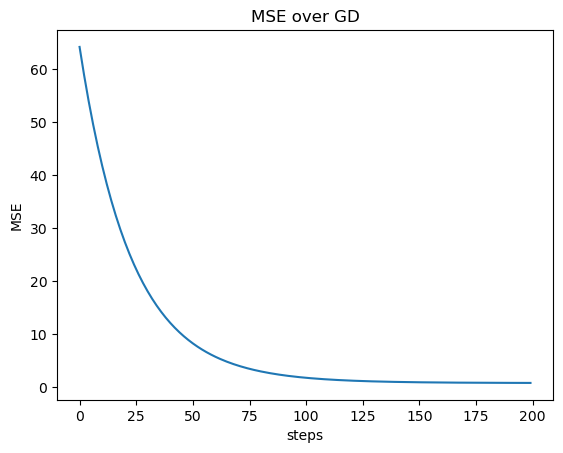

In [14]:
plt.plot(f_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 

In [15]:
print(f_value_list[199])

0.8172368289958711


## Polynomial Regression with gradient descent

In [16]:
lr = 0.001

poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)
n = phi.shape[0]
d = phi.shape[1]
w = randn(d,1)

In [17]:
def f(w):
    num = 0
    for xi, yi in zip(phi,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()

In [18]:
def f_dx(w):
    num = 0
    for xi, yi in zip(phi,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [19]:
mse_list = []
for i in range(2500):
    w = w - lr * f_dx(w)
    mse_list.append(f(w))
print("Best w:")
print(w)


Best w:
[[ 0.7797]
 [ 0.1164]
 [ 3.8753]
 [-0.0115]
 [ 0.0046]
 [ 0.9388]
 [ 2.9119]
 [ 4.0373]
 [ 2.9664]
 [ 0.8358]
 [ 0.8852]
 [ 0.1949]
 [-0.1111]
 [ 0.0183]
 [-0.067 ]
 [-0.0073]
 [-0.0546]
 [ 0.1359]
 [-0.0628]
 [-0.0712]
 [ 0.025 ]
 [ 0.0774]
 [-0.0494]
 [-0.0671]
 [ 0.0775]
 [ 0.0351]
 [-0.039 ]
 [-0.0053]
 [ 0.0199]
 [ 0.1802]
 [ 0.0702]
 [ 0.1146]
 [ 0.1067]
 [ 0.078 ]
 [-0.0499]
 [-0.0328]
 [ 0.1309]
 [ 0.1743]
 [-0.0155]
 [ 0.1192]
 [-0.0374]
 [-0.1205]
 [-0.006 ]
 [ 0.0159]
 [-0.0705]
 [-0.0414]
 [ 0.0021]
 [-0.1231]
 [-0.0869]
 [ 0.1456]
 [-0.0029]
 [-0.036 ]
 [-0.0374]
 [ 0.0286]
 [-0.0239]
 [-0.0907]
 [-0.0015]
 [ 0.0585]
 [-0.113 ]
 [ 0.0077]
 [ 0.0331]
 [ 0.1879]
 [ 0.1013]
 [-0.1538]
 [-0.0643]
 [-0.007 ]]


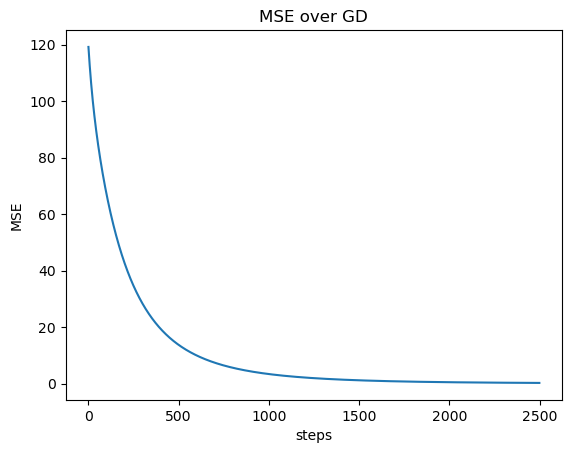

In [20]:
plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 

In [21]:
print(mse_list[2499])

0.22932602825636783
